<a href="https://colab.research.google.com/github/diyorarti/classification-problem/blob/main/neurol_network_development_to_predict_the_satisfaction_of_airplane_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('/content/train_dataset.csv')
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


# Data prepariation

In [ ]:
data.shape

(10000, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
encoder = OrdinalEncoder()

cat_col = data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
data[['Gender', 'Customer Type', 'Type of Travel', 'Class']]=encoder.fit_transform(cat_col)

In [ ]:
data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [ ]:
data = data.fillna({'Arrival Delay in Minutes':np.mean(data['Arrival Delay in Minutes'])})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  float64
 2   Customer Type                      10000 non-null  float64
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  float64
 5   Class                              10000 non-null  float64
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [ ]:
drop_col = ['id', 'satisfaction']

x = data.drop(drop_col, axis=1)
y = data[['satisfaction']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)


# Neurol Network

In [ ]:
model = Sequential(
    [
        Dense(140, activation='relu',   name='layer1'),
        Dense(40,  activation='relu',   name='layer2'),
        Dense(1,  activation='sigmoid', name='layer3')
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    x_train, y_train,
    epochs=100
)

Epoch 1/100
188/188 [==============================] - 3s 5ms/step - loss: 3.4898
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 1.0631
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 1.0462
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 1.0049
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 1.1429
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.5469
Epoch 7/100
188/188 [==============================] - 0s 3ms/step - loss: 0.8371
Epoch 8/100
188/188 [==============================] - 0s 3ms/step - loss: 0.7922
Epoch 9/100
188/188 [==============================] - 1s 4ms/step - loss: 0.9615
Epoch 10/100
188/188 [==============================] - 1s 4ms/step - loss: 0.7370
Epoch 11/100
188/188 [==============================] - 1s 4ms/step - loss: 0.5102
Epoch 12/100
188/188 [==============================] - 1s 4ms/step - loss: 0.9048
Epoch 13/100


In [ ]:
predictions = model.predict(x_train)

train_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    train_yhat[i] = 1
  else:
    train_yhat[i] = 0

acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {acc}')

188/188 [==============================] - 0s 2ms/step
train accuracy 0.501


In [ ]:
predictions = model.predict(x_test)

test_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    test_yhat[i] = 1
  else:
    test_yhat[i] = 0

acc = accuracy_score(y_test, test_yhat)
print(acc)

125/125 [==============================] - 0s 2ms/step
0.902


# Model development

# Scaling

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = Sequential(
    [
        Dense(140, activation='relu',    name='layer1'),
        Dense(40,  activation='relu',    name='layer2'),
        Dense(1,   activation='sigmoid', name='layer3')
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    x_train_scaled, y_train,
    epochs=100
)

In [ ]:
predictions = model.predict(x_train_scaled)

train_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    train_yhat[i] = 1
  else:
    train_yhat[i] = 0

acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {acc}')

188/188 [==============================] - 1s 2ms/step
train accuracy 1.0


In [ ]:
predictions = model.predict(x_test_scaled)

test_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    test_yhat[i] = 1
  else:
    test_yhat[i] = 0

acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {acc}')

125/125 [==============================] - 0s 2ms/step
test accuracy 0.93725


# Polynomial Features

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

In [ ]:
model = Sequential(
    [
        Dense(140, activation='relu',    name='layer1'),
        Dense(40,  activation='relu',    name='layer2'),
        Dense(1,   activation='sigmoid', name='layer3')
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    x_train_mapped, y_train,
    epochs=100
)

In [ ]:
predictions = model.predict(x_train_mapped)

train_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    train_yhat[i] = 1
  else:
    train_yhat[i] = 0

acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {acc}')

188/188 [==============================] - 2s 11ms/step
train accuracy 0.5261666666666667


In [ ]:
predictions = model.predict(x_test_mapped)

test_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    test_yhat[i] = 1
  else:
    test_yhat[i] = 0

acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {acc}')

125/125 [==============================] - 2s 17ms/step
test accuracy 0.516


as you see , polynomial feature desreases model performance dramtically

# evaluate data set

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
drop_col = ['id', 'satisfaction']
x = data.drop(drop_col, axis=1)
y = data[['satisfaction']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)


# Regularization

In [ ]:
model = Sequential(
      [
          Dense(140, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
          Dense(40,  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
          Dense(1,   activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001))
      ]
)
model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
)
model.fit(
      x_train, y_train,
      epochs=100
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


188/188 [==============================] - 1s 2ms/step - loss: 1.4892
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.8335
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.7484
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.6486
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.6501
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.6545
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5750
Epoch 8/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5876
Epoch 9/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5494
Epoch 10/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5553
Epoch 11/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5230
Epoch 12/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5357
Epoch 13/100
188/188 [===

In [ ]:
predictions = model.predict(x_train)

train_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    train_yhat[i] = 1
  else:
    train_yhat[i] = 0

acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {acc}')

188/188 [==============================] - 0s 1ms/step
train accuracy 0.8766666666666667


In [ ]:
predictions = model.predict(x_cv)

test_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    test_yhat[i] = 1
  else:
    test_yhat[i] = 0

acc = accuracy_score(y_cv, test_yhat)
print(f'test accuracy {acc}')

63/63 [==============================] - 0s 2ms/step
test accuracy 0.874


# the best neurol network model for this problem

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1.0,1.0,33,0.0,1.0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0.0,0.0,49,0.0,0.0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0.0,0.0,43,0.0,1.0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0.0,0.0,27,0.0,0.0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1.0,0.0,11,1.0,1.0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [ ]:
drop_col = ['id', 'satisfaction']

x = data.drop(drop_col, axis=1)
y = data[['satisfaction']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)


In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = Sequential(
    [
        Dense(140, activation='relu',    name='layer1'),
        Dense(40,  activation='relu',    name='layer2'),
        Dense(1,   activation='sigmoid', name='layer3')
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    x_train_scaled, y_train,
    epochs=100
)

Epoch 1/100
188/188 [==============================] - 3s 2ms/step - loss: 0.3440
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1689
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1534
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1426
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1351
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1257
Epoch 9/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1163
Epoch 10/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1128
Epoch 11/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1057
Epoch 12/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0984
Epoch 13/100


In [ ]:
predictions = model.predict(x_train_scaled)

train_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    train_yhat[i] = 1
  else:
    train_yhat[i] = 0

acc = accuracy_score(y_train, train_yhat)
print(f'train accuracy {acc}')

188/188 [==============================] - 0s 1ms/step
train accuracy 0.9998333333333334


In [ ]:
predictions = model.predict(x_test_scaled)

test_yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
  if predictions[i] >= 0.5:
    test_yhat[i] = 1
  else:
    test_yhat[i] = 0

acc = accuracy_score(y_test, test_yhat)
print(f'test accuracy {acc}')

125/125 [==============================] - 0s 2ms/step
test accuracy 0.93775


In [ ]:
jacc = jaccard_score(y_test, test_yhat)
print(f'jaccrad score for test set {jacc}')

jaccrad score for test set 0.8821022727272727


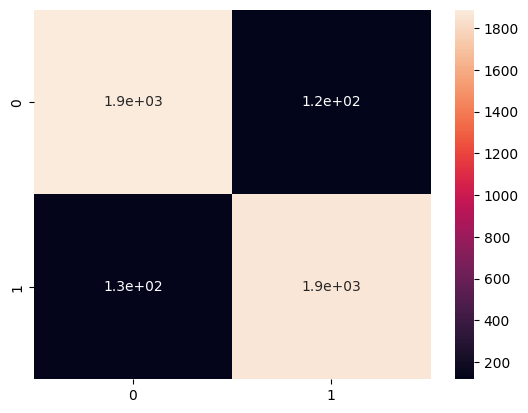

In [ ]:
sns.heatmap(confusion_matrix(y_test, test_yhat), annot=True)
plt.show()